# <div align="center">Trabalho Final </div>
# <div align="center">Infer√™ncia Estat√≠stica </div> 


### Grupo.
#### Aluno: Renan Lemes Leepkaln
#### Aluno: Valdiclei Costa Marinho

## <div align="center">Exerc√≠cio 1</div>

##### Utilizar a base  ‚Äúocd_patient_dataset.csv‚Äù √© um conjunto dedados de pacientes com TOC que possui dados demogr√°ficos e cl√≠nicos quecont√©m informa√ß√µes abrangentes sobre 1.500 indiv√≠duos com diagn√≥stico detranstorno obsessivo-compulsivo (TOC). Observa√ß√£o: o conjunto de dados √© inteiramente fict√≠cio e n√£o deve ser usado para quaisquer fins cl√≠nicos ou de pesquisa reais. Use um n√≠vel de signific√¢ncia de 5% para testar a afirmativa de que existe diferen√ßa no Score (Pontua√ß√£o) Y-BOCS (Obsess√µes) entre pacientes dos sexo feminino e masculino. Com base neste resultado, podemos concluir que existe diferen√ßa?

#### <div align="center">**Hip√≥teses:**</div>
$$
    H_0 : \mu_{female} - \mu_{male} = 0 \newline 
    H_1 : \mu_{female} - \mu_{male} \neq 0
$$

In [2]:
## Libs para tratamento de dados
import pandas as pd
import numpy as np

## Libs para Analise
from scipy.stats import norm, skew
from scipy import stats
from scipy.stats import shapiro, levene, mannwhitneyu, chi2_contingency,kruskal
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd


## Libs para graficos
import matplotlib.pyplot as plt

plt.style.use("default")
import seaborn as sns

## Lib para ignorar os aviso
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("ocd_patient_dataset.csv", sep=",")

data.head()

Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180               None   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related        Checking   
1                   Yes   Harm-related         Washing   
2                    No  Contamination        Checking   
3                   Yes       Symmetry         Washing   
4                   Yes       Hoarding        Ordering   

   Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions) Depression Diagnosis  \
0                         17                          10                  Yes   
1                         21                          25                  Yes   
2                          3                           4                   No   
3                         14                          28                  Yes   
4                         39                          18                   No   

  Anxiety Diagnosis     Medications  
0               Yes            SNRI  
1               Yes            SSRI  
2                No  Benzodiazepine  
3               Yes            SSRI  
4                No            None

In [4]:
## Pegando apenas Sexo e Score 
df = pd.DataFrame(data[["Gender", "Y-BOCS Score (Obsessions)"]])

In [5]:
df.shape

(1500, 2)

In [6]:
df.describe()

Y-BOCS Score (Obsessions)
count                1500.000000
mean                   20.048000
std                    11.823884
min                     0.000000
25%                    10.000000
50%                    20.000000
75%                    31.000000
max                    40.000000

In [7]:
## Verificando se tem valor nulo e vendo em %
df.isnull().sum().sort_index() / len(df)

Gender                       0.0
Y-BOCS Score (Obsessions)    0.0
dtype: float64

In [8]:
## Vereficando se tem valores NaN em %
df.isna().sum().sort_index() / len(df)

Gender                       0.0
Y-BOCS Score (Obsessions)    0.0
dtype: float64

In [9]:
(df["Y-BOCS Score (Obsessions)"] < 0).sum()

0

In [10]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
tabela_frequencia = df["Gender"].value_counts().reset_index()
tabela_frequencia.columns = ["Valor", "Frequ√™ncia"]
tabela_frequencia = tabela_frequencia.sort_values(by="Valor")
tabela_frequencia

Valor  Frequ√™ncia
1  Female         747
0    Male         753

In [12]:
escores_female = df[df["Gender"] == "Female"]["Y-BOCS Score (Obsessions)"]
escores_male = df[df["Gender"] == "Male"]["Y-BOCS Score (Obsessions)"]

In [13]:
display(escores_female.to_frame().head(), escores_male.to_frame().head())

Y-BOCS Score (Obsessions)
0                         17
3                         14
4                         39
5                         26
6                         12

Y-BOCS Score (Obsessions)
1                          21
2                           3
7                          31
8                          37
15                         17

### <div align="center">An√°lise de ajuste de uma distribui√ß√£o normal </div>

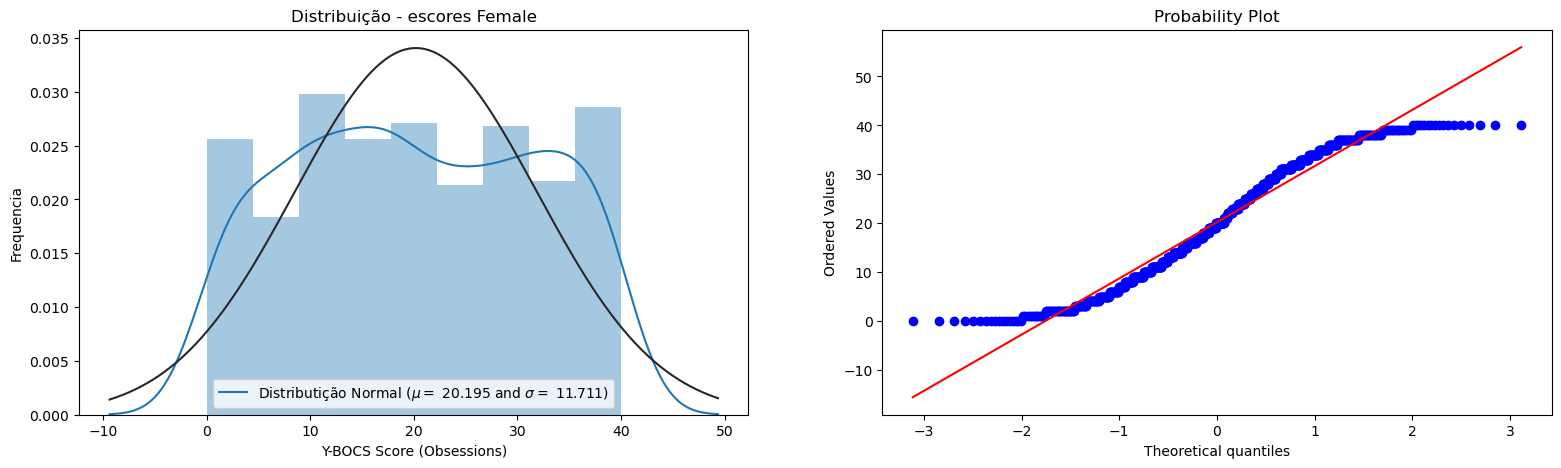

In [14]:
(mu, sigma) = norm.fit(escores_female)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))

ax1 = sns.distplot(escores_female, fit=norm, ax=ax1)
ax1.legend(
    [f"Distributi√ß√£o Normal ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})"], loc="best"
)
ax1.set_ylabel("Frequencia")
ax1.set_title(f"Distribui√ß√£o - escores Female")

# Usando probplot para o gr√°fico de probabilidade
stats.probplot(escores_female, plot=ax2)
f.show()

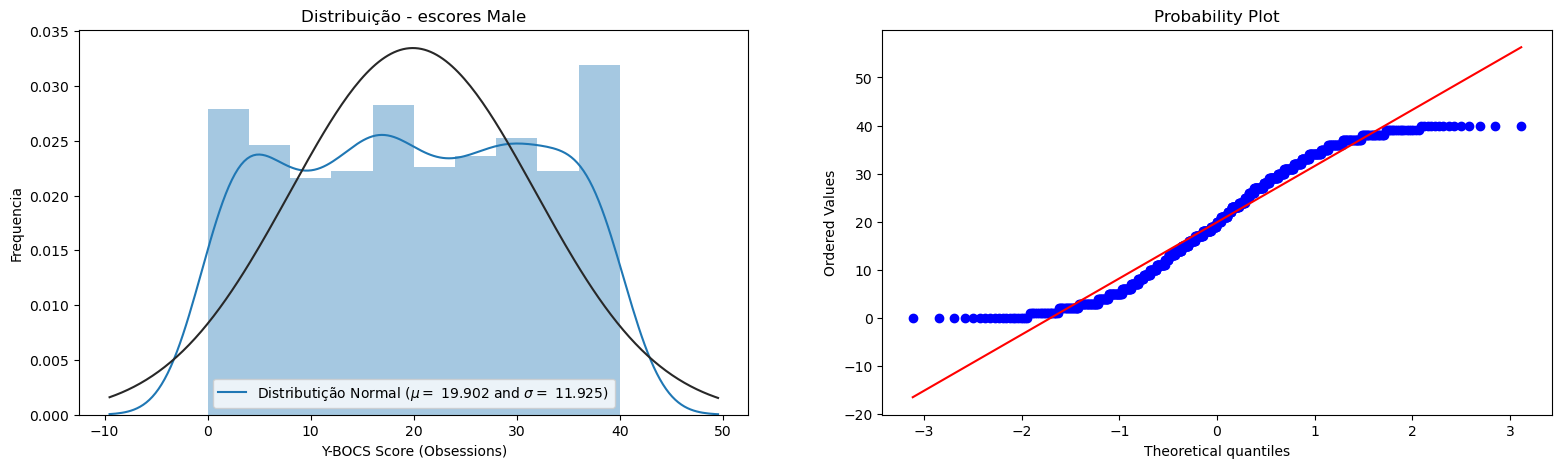

In [15]:
(mu, sigma) = norm.fit(escores_male)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))

ax1 = sns.distplot(escores_male, fit=norm, ax=ax1)
ax1.legend(
    [f"Distributi√ß√£o Normal ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})"], loc="best"
)
ax1.set_ylabel("Frequencia")
ax1.set_title(f"Distribui√ß√£o - escores Male")

# Usando probplot para o gr√°fico de probabilidade
stats.probplot(escores_male, plot=ax2)
f.show()

### <div align="center">Teste de Normalidade e Homogeneidade </div>

In [16]:
# Teste de Shapiro para normalizada
_, p_valor_feminino = shapiro(escores_female)
_, p_valor_masculino = shapiro(escores_male)

# Teste de Levene para homogeneidade das vari√¢ncias
_, p_valor_variancias = levene(escores_female, escores_male)

print(
    f"p_valor_feminino: {p_valor_feminino}, p_valor_masculino: {p_valor_masculino}, p_valor_variancias: {p_valor_variancias}"
)

# Avalia√ß√£o de pressupostos (normalidade e homogeneidade das vari√¢ncias)
if p_valor_feminino > 0.05 and p_valor_masculino > 0.05 and p_valor_variancias > 0.05:
    # Realizar o teste t de Student
    resultado_teste_t, valor_p = ttest_ind(escores_female, escores_male)

    # Exibir o resultado do teste
    print(
        f'Teste t de Student: {"Diferen√ßa significativa" if valor_p < nivel_significancia else "Sem diferen√ßa significativa"}'
    )
    print(f"Estat√≠sticas: {resultado_teste_t}, Valor p: {valor_p}")
else:
    print(
        "Os pressupostos para o teste t de Student n√£o foram atendidos. Seguir com teste n√£o param√©trico."
    )

p_valor_feminino: 2.3539514860449785e-14, p_valor_masculino: 3.466535911472138e-15, p_valor_variancias: 0.46910653120857493
Os pressupostos para o teste t de Student n√£o foram atendidos. Seguir com teste n√£o param√©trico.


### <div align="center">Teste de Mann-Whitney U: </div>

N√£o assume uma distribui√ß√£o espec√≠fica para os dados.

In [17]:
# Teste de Mann-Whitney U
estatisticas, valor_p = mannwhitneyu(escores_female, escores_male)

nivel_significancia = 0.05

print(
    f'Teste de Mann-Whitney U: {"Diferen√ßa significativa" if valor_p < nivel_significancia else "Sem diferen√ßa significativa"}'
)
print(f"Estat√≠sticas: {estatisticas}, Valor p: {valor_p}")

Teste de Mann-Whitney U: Sem diferen√ßa significativa
Estat√≠sticas: 285168.0, Valor p: 0.6399821232917488


**Resposta** : $\newline$
Com base nos resultados do teste de Mann-Whitney U, n√£o h√° evid√™ncia estat√≠stica suficiente para afirmar que h√° uma diferen√ßa significativa nos escores entre os grupos feminino e masculino.

-----

## <div align="center">Exerc√≠cio 2</div>

##### O conjunto de dados ‚ÄúSleep_health_and_lifestyle_dataset.csv‚Äù compreende 400 linhas e 13 colunas, cobrindo uma ampla gama de vari√°veis relacionadas ao sono e h√°bitos di√°rios. Inclui detalhes como sexo, idade, ocupa√ß√£o, dura√ß√£o do sono, qualidade do sono, n√≠vel de atividade f√≠sica, n√≠veis de estresse, categoria de IMC, press√£o arterial, frequ√™ncia card√≠aca, passos di√°rios e presen√ßa ou aus√™ncia do dist√∫rbio do sono (Ins√¥nia). O nosso objetivo √© avaliar se existe diferen√ßa na propor√ß√£o de pessoas que possuem ou n√£o o dist√∫rbio do sono (Ins√¥nia) para as diferen√ßas ocupa√ß√µes na base de dados. Use o n√≠vel de signific√¢ncia de 5% e caso encontre diferen√ßas, relate em quais das ocupa√ß√µes vemos essa diferen√ßa significativa.

*Objetivo*:  
Avaliar se existe diferen√ßa na propor√ß√£o de pessoas que possuem ou n√£o o dist√∫rbio do sono (Ins√¥nia) para as diferen√ßas ocupa√ß√µes na base de dados. Use o n√≠vel de signific√¢ncia de 5% e caso encontre diferen√ßas, relate em quais das ocupa√ß√µes vemos essa diferen√ßa significativa.

#### <div align="center">**Hip√≥teses:**</div>
$$
    H_0 : \text{as propor√ß√µes de pessoas com e sem ins√¥nia s√£o iguais para todas as ocupa√ß√µes.} \newline 
    H_1 : \text{as propor√ß√µes de pessoas com e sem ins√¥nia s√£o diferentes para pelo menos uma ocupa√ß√£o.}
$$

In [18]:
data2 = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv", sep=",")
data2.head()

Person ID Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
0          2   Male   28     Doctor             6.2                 6   
1          3   Male   28     Doctor             6.2                 6   
2          7   Male   29    Teacher             6.3                 6   
3          8   Male   29     Doctor             7.8                 7   
4          9   Male   29     Doctor             7.8                 7   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       60             8       Normal         125/80   
1                       60             8       Normal         125/80   
2                       40             7        Obese         140/90   
3                       75             6       Normal         120/80   
4                       75             6       Normal         120/80   

   Heart Rate  Daily Steps Sleep Disorder  
0          75        10000             No  
1          75        10000             No  
2          82         3500       Insomnia  
3          70         8000             No  
4          70         8000             No

In [19]:
df = pd.DataFrame(data2[["Occupation", "Sleep Disorder"]])
df.head()

Occupation Sleep Disorder
0     Doctor             No
1     Doctor             No
2    Teacher       Insomnia
3     Doctor             No
4     Doctor             No

In [20]:
df.describe()

Occupation Sleep Disorder
count         289            289
unique          7              2
top        Doctor             No
freq           67            213

In [21]:
df.isnull().sum().sort_index() / len(df)

Occupation        0.0
Sleep Disorder    0.0
dtype: float64

In [22]:
df.isna().sum().sort_index() / len(df)

Occupation        0.0
Sleep Disorder    0.0
dtype: float64

In [23]:
df["Occupation"].unique()

array(['Doctor', 'Teacher', 'Nurse', 'Engineer', 'Accountant', 'Lawyer',
       'Salesperson'], dtype=object)

In [24]:
df["Sleep Disorder"].unique()

array(['No', 'Insomnia'], dtype=object)

In [25]:
tabela_frequencia_occup = df["Occupation"].value_counts().reset_index()
tabela_frequencia_occup.columns = ["Valor", "Frequ√™ncia"]
tabela_frequencia_occup = tabela_frequencia_occup.sort_values(by="Valor")
print(tabela_frequencia_occup)

         Valor  Frequ√™ncia
3   Accountant          37
0       Doctor          67
1     Engineer          62
2       Lawyer          44
6        Nurse          12
5  Salesperson          31
4      Teacher          36


In [26]:
tabela_frequencia_slp = df["Sleep Disorder"].value_counts().reset_index()
tabela_frequencia_slp.columns = ["Valor", "Frequ√™ncia"]
tabela_frequencia_slp = tabela_frequencia_slp.sort_values(by="Valor")
print(tabela_frequencia_slp)

      Valor  Frequ√™ncia
1  Insomnia          76
0        No         213


In [27]:
# Tabela de conting√™ncia
contingency_table = pd.crosstab(df["Sleep Disorder"], df["Occupation"])
contingency_table

Occupation      Accountant  Doctor  Engineer  Lawyer  Nurse  Salesperson  \
Sleep Disorder                                                             
Insomnia                 7       3         5       2      3           29   
No                      30      64        57      42      9            2   

Occupation      Teacher  
Sleep Disorder           
Insomnia             27  
No                    9

## Aplica√ß√£o do teste qui-quadrado para independ√™ncia 

Apropriada quando se trabalha com vari√°veis categ√≥ricas e deseja-se avaliar se a ocorr√™ncia de uma categoria em uma vari√°vel √© independente da ocorr√™ncia de uma categoria em outra vari√°vel. 

In [28]:
# Tabela de conting√™ncia
contingency_table = pd.crosstab(df["Sleep Disorder"], df["Occupation"])

# Verifica frequencias esperadas
expected_frequencies = chi2_contingency(contingency_table)[3]

if (expected_frequencies < 1).any():
    print("Algumas c√©lulas t√™m frequ√™ncias esperadas abaixo de 1")

# Teste qui-quadrado de independ√™ncia (Vari√°veis categoricas)
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("H√° uma diferen√ßa significativa nas propor√ß√µes entre as ocupa√ß√µes.\n")

    # Se houver uma diferen√ßa significativa calculamos as propor√ß√µes de ins√¥nia em cada ocupa√ß√£o.
    proportions = (df.groupby("Occupation")["Sleep Disorder"].value_counts(normalize=True).unstack())
    print(proportions)
else:
    print(
        "N√£o h√° evid√™ncias de diferen√ßa significativa nas propor√ß√µes entre as ocupa√ß√µes."
    )

Chi-square statistic: 155.27672811256065
P-value: 5.9210138109735935e-31
H√° uma diferen√ßa significativa nas propor√ß√µes entre as ocupa√ß√µes.

Sleep Disorder  Insomnia        No
Occupation                        
Accountant      0.189189  0.810811
Doctor          0.044776  0.955224
Engineer        0.080645  0.919355
Lawyer          0.045455  0.954545
Nurse           0.250000  0.750000
Salesperson     0.935484  0.064516
Teacher         0.750000  0.250000


**Resposta** : $\newline$
Sim h√° uma diferen√ßa significativa nas propor√ß√µes entre as ocupa√ß√µes.

----

## <div align="center">Exerc√≠cio 3</div>

##### Uma empresa de tecnologia est√° constantemente analisando o mercado e buscando novas formas de converter os clientes (fechar contratos). Pensando nisso, ela investiu em uma empresa de treinamento de vendedores (VendaPro Academy) que diz que o seu m√©todo de vendas √© superior aos m√©todos convencionais. Para verificar essa hip√≥tese, a empresa de tecnologia vai avaliar o desempenho dos funcion√°rios. Vamos comparar o desempenho de 35 vendedores ao utilizar o m√©todo convencional de vendas e o m√©todo obtido pelo treinamento com a empresa VendaPro Academy, medindo o tempo de trabalho em horas necess√°rio para alcan√ßar uma meta de 10 contratos vendidos. Os dados est√£o na base de dados ‚ÄútreinamentoVendedores.csv‚Äù. Determine ao n√≠vel de 2% de signific√¢ncia, se o m√©todo da empresa VendaPro Academy √© realmente superior ao m√©todo convencional da empresa.

*Objetivo*: Determine ao n√≠vel de 2% de signific√¢ncia, se o m√©todo da empresa VendaPro Academy √© realmente superior ao m√©todo convencional da empresa.

#### <div align="center">**Hip√≥teses:**</div>
$$
    H_0 : \overline{x}_1 - \overline{x}_2 = 0 \newline
    H_1 : \overline{x}_1 - \overline{x}_2 > 0
$$
$$
    H_0 : \text{N√£o h√° diferen√ßa significativa entre as m√©dias das duas amostras.} \newline 
    H_1 : \text{H√° uma diferen√ßa significativa entre as m√©dias das duas amostras. }
$$

In [29]:
data3 = pd.read_csv("treinamentoVendedores.csv", sep=",")
data3.head()
df = data3.copy()
df.head()

Funcion√°rio  Convencional   VendaPro
0            1     52.483571  38.895782
1            2     49.308678  46.044318
2            3     53.238443  35.201649
3            4     57.615149  38.359070
4            5     48.829233  45.984306

### Aplica√ß√£o de teste t pareado

Apropriado quando voc√™ temos pares de observa√ß√µes relacionadas (no caso, os tempos de trabalho para cada funcion√°rio nos dois m√©todos). 

**Avalia√ß√£o dos pressupostos:**

**1. normalidade das diferen√ßas**

In [30]:
# Shapiro
_, normalidade_p_value = stats.shapiro(df["Convencional"] - df["VendaPro"])

# N√≠vel de signific√¢ncia
alpha = 0.05

# Avalia√ß√£o da normalidade das diferen√ßas
if normalidade_p_value > alpha:
    print(
        "A diferen√ßa entre os m√©todos tem uma distribui√ß√£o normal (n√£o rejeita H0 de normalidade)."
    )
else:
    print(
        "A diferen√ßa entre os m√©todos n√£o tem uma distribui√ß√£o normal (rejeita H0 de normalidade)."
    )

A diferen√ßa entre os m√©todos tem uma distribui√ß√£o normal (n√£o rejeita H0 de normalidade).


**2. homogeneidade das vari√¢ncias das diferen√ßas**

In [31]:
# levene
homogeneidade_p_value = stats.levene(df["Convencional"], df["VendaPro"]).pvalue

# N√≠vel de signific√¢ncia
alpha = 0.05

# Avalia√ß√£o da homogeneidade das vari√¢ncias das diferen√ßas
if homogeneidade_p_value > alpha:
    print(
        "As vari√¢ncias das diferen√ßas s√£o homog√™neas (n√£o rejeita H0 de homogeneidade de vari√¢ncias)."
    )
else:
    print(
        "As vari√¢ncias das diferen√ßas n√£o s√£o homog√™neas (rejeita H0 de homogeneidade de vari√¢ncias)."
    )

As vari√¢ncias das diferen√ßas s√£o homog√™neas (n√£o rejeita H0 de homogeneidade de vari√¢ncias).


### Realiza√ß√£o do teste t pareado ap√≥s os pressupostos serem atendidos

In [32]:
if normalidade_p_value > alpha and homogeneidade_p_value > alpha:
    t_statistic, p_value = stats.ttest_rel(df["Convencional"], df["VendaPro"])

    # Verifica a signific√¢ncia estat√≠stica
    if p_value < alpha:
        print(
            "Rejeita a hip√≥tese nula. Existe evid√™ncia estat√≠stica de que o m√©todo VendaPro Academy √© superior ao m√©todo convencional."
        )
    else:
        print(
            "N√£o h√° evid√™ncia estat√≠stica suficiente para rejeitar a hip√≥tese nula. N√£o podemos afirmar que um m√©todo √© superior ao outro."
        )
else:
    print(
        "N√£o √© apropriado realizar o teste t pareado devido √†s viola√ß√µes dos pressupostos."
    )

Rejeita a hip√≥tese nula. Existe evid√™ncia estat√≠stica de que o m√©todo VendaPro Academy √© superior ao m√©todo convencional.


**Resposta** : $\newline$
Por tanto o m√©todo VendaPro e melhor que o m√©todo convencional.

----

## <div align="center">Exerc√≠cio 4</div>

##### Em um mundo onde a m√∫sica desempenha um papel fundamental nas experi√™ncias di√°rias, a imers√£o em uma variedade de g√™neros musicais tornou-se uma parte intr√≠nseca da vida cotidiana. Com a ascens√£o de plataformas de streaming e a facilidade de acesso √† m√∫sica, as pessoas desfrutam da liberdade de escolher seus g√™neros preferidos e dedicar tempo consider√°vel √† aprecia√ß√£o das composi√ß√µes que ressoam com suas emo√ß√µes. Este fen√¥meno despertou um interesse significativo em compreender o tempo dedicado diariamente √†s m√∫sicas favoritas das pessoas, bem como explorar se existem diferen√ßas not√°veis nos h√°bitos de escuta entre os diversos g√™neros musicais. No conjunto de dados "Musicas.csv", encontramos informa√ß√µes detalhadas sobre usu√°rios de v√°rias idades, incluindo dados sobre seus h√°bitos musicais, como o g√™nero favorito e o tempo di√°rio dedicado √† audi√ß√£o musical. O objetivo central deste estudo √© testar a hip√≥tese de que existe uma diferen√ßa significativa no tempo, em horas, que as pessoas dedicam diariamente √† audi√ß√£o de m√∫sica, com base em seus g√™neros musicais favoritos. Use as colunas: (Fav genre - g√™nero favorito e Hours per day - horas por dia). Use o n√≠vel de signific√¢ncia de 5% para verificar essa hip√≥tese.

*Objetivo*: O objetivo central deste estudo √© testar a hip√≥tese de que existe uma diferen√ßa significativa no tempo, em horas, que as pessoas dedicam diariamente √† audi√ß√£o de m√∫sica, com base em seus g√™neros musicais favoritos. Utilizar o n√≠vel de signific√¢ncia de 5% para verificar essa hip√≥tese.

#### <div align="center">**Hip√≥teses:**</div>

$$
    H_0 : \text{N√£o h√° diferen√ßa significativa no tempo m√©dio dedicado √† audi√ß√£o de m√∫sica entre os diferentes g√™neros musicais.} \newline 
    H_1 : \text{Existe uma diferen√ßa significativa no tempo m√©dio dedicado √† audi√ß√£o de m√∫sica entre os diferentes g√™neros musicais}
$$

In [33]:
data4 = pd.read_csv("Musicas.csv", sep=",")
data4.head()

Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:57:31  63.0                   Pandora            1.5   
1  8/27/2022 21:28:18  18.0                   Spotify            4.0   
2  8/27/2022 21:54:47  18.0                   Spotify            4.0   
3  8/27/2022 22:00:29  18.0             YouTube Music            3.0   
4  8/27/2022 22:18:59  21.0                   Spotify            1.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes              No       No              Rock         Yes   
1            No              No       No  Video game music          No   
2           Yes              No       No               R&B         Yes   
3           Yes             Yes       No  Video game music         Yes   
4           Yes              No       No             K pop         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                No  ...        Sometimes           Rarely  Very frequently   
1               Yes  ...            Never           Rarely           Rarely   
2                No  ...  Very frequently  Very frequently            Never   
3               Yes  ...           Rarely            Never            Never   
4               Yes  ...        Sometimes           Rarely            Never   

  Frequency [Video game music] Anxiety Depression Insomnia  OCD Music effects  \
0                       Rarely     7.0        2.0      2.0  1.0           NaN   
1              Very frequently     7.0        7.0     10.0  2.0     No effect   
2                       Rarely     7.0        2.0      5.0  9.0       Improve   
3                    Sometimes     4.0        8.0      6.0  0.0       Improve   
4                       Rarely     5.0        3.0      5.0  3.0       Improve   

     Permissions  
0  I understand.  
1  I understand.  
2  I understand.  
3  I understand.  
4  I understand.  

[5 rows x 33 columns]

In [34]:
df = pd.DataFrame(data4[["Fav genre", "Hours per day"]])
df.head()

Fav genre  Hours per day
0              Rock            1.5
1  Video game music            4.0
2               R&B            4.0
3  Video game music            3.0
4             K pop            1.0

In [35]:
df.isnull().sum().sort_index() / len(df)

Fav genre        0.0
Hours per day    0.0
dtype: float64

In [36]:
df.isna().sum().sort_index() / len(df)

Fav genre        0.0
Hours per day    0.0
dtype: float64

In [37]:
df["Fav genre"].unique()

array(['Rock', 'Video game music', 'R&B', 'K pop', 'Country', 'EDM',
       'Hip hop', 'Pop', 'Rap', 'Classical', 'Metal', 'Folk'],
      dtype=object)

In [38]:
df["Hours per day"].unique()

array([ 1.5 ,  4.  ,  3.  ,  1.  ,  6.  ,  8.  ,  2.  , 12.  , 24.  ,
        5.  ,  0.5 ,  0.25,  0.  ,  7.  , 10.  ,  2.5 ,  9.  ,  0.7 ,
        4.5 , 20.  , 15.  , 14.  , 13.  ,  0.1 , 11.  , 18.  ])

In [39]:
tabela_frequencia_FavGenre = df["Fav genre"].value_counts().reset_index()
tabela_frequencia_FavGenre.columns = ["Valor", "Frequ√™ncia"]
tabela_frequencia_FavGenre = tabela_frequencia_FavGenre.sort_values(by="Valor")
tabela_frequencia_FavGenre.head()

Valor  Frequ√™ncia
3   Classical          53
10    Country          25
5         EDM          37
8        Folk          30
7     Hip hop          35

In [40]:
tabela_frequencia_Hours = df["Hours per day"].value_counts().reset_index()
tabela_frequencia_Hours.columns = ["Valor", "Frequ√™ncia"]
tabela_frequencia_Hours = tabela_frequencia_Hours.sort_values(by="Valor")
tabela_frequencia_Hours.head()

Valor  Frequ√™ncia
12   0.00           6
23   0.10           1
16   0.25           2
7    0.50          20
18   0.70           1

**Shapiro-Wilk para normalidade por grupo de g√™nero musical**

In [41]:
# Shapiro-Wilk para normalidade por grupo de g√™nero musical
for genre in df["Fav genre"].unique():
    print(genre)
    print("--------------------------------------------------")
    genre_data = df[df["Fav genre"] == genre]["Hours per day"]
    stat, p_value = shapiro(genre_data)
    print(f"Shapiro-Wilk Test for {genre} : p-value: {p_value}")
    if p_value > 0.05:
        print(f"Os dados de {genre}: parecem seguir uma distribui√ß√£o normal.")
    else:
        print(f"Os dados de {genre}: n√£o seguem uma distribui√ß√£o normal.\n")

Rock
--------------------------------------------------
Shapiro-Wilk Test for Rock : p-value: 2.0905416353880454e-16
Os dados de Rock: n√£o seguem uma distribui√ß√£o normal.

Video game music
--------------------------------------------------
Shapiro-Wilk Test for Video game music : p-value: 1.3959829630039167e-05
Os dados de Video game music: n√£o seguem uma distribui√ß√£o normal.

R&B
--------------------------------------------------
Shapiro-Wilk Test for R&B : p-value: 0.00018480031576473266
Os dados de R&B: n√£o seguem uma distribui√ß√£o normal.

K pop
--------------------------------------------------
Shapiro-Wilk Test for K pop : p-value: 0.00015500000154133886
Os dados de K pop: n√£o seguem uma distribui√ß√£o normal.

Country
--------------------------------------------------
Shapiro-Wilk Test for Country : p-value: 0.013172503560781479
Os dados de Country: n√£o seguem uma distribui√ß√£o normal.

EDM
--------------------------------------------------
Shapiro-Wilk Test for EDM :

**Levene para homogeneidade das vari√¢ncias**

In [42]:
stat, p_value = levene(
    df[df["Fav genre"] == "Rock"]["Hours per day"],
    df[df["Fav genre"] == "Video game music"]["Hours per day"],
    df[df["Fav genre"] == "R&B"]["Hours per day"],
    df[df["Fav genre"] == "K pop"]["Hours per day"],
)
print(f"Levene Test - p-value: {p_value}")
if p_value > 0.05:
    print("As vari√¢ncias s√£o homog√™neas.")
else:
    print("As vari√¢ncias n√£o s√£o homog√™neas.")

Levene Test - p-value: 0.48529179962978475
As vari√¢ncias s√£o homog√™neas.


**Como os dados n√£o seguiram uma distribui√ß√£o normal, ser√° utilizado um teste N√£o-Param√©trico: kruskal**

In [43]:
# Kruskal-Wallis para comparar os grupos
h_statistic, p_value = kruskal(
    df[df["Fav genre"] == "Rock"]["Hours per day"],
    df[df["Fav genre"] == "Video game music"]["Hours per day"],
    df[df["Fav genre"] == "R&B"]["Hours per day"],
    df[df["Fav genre"] == "K pop"]["Hours per day"],
)

# An√°lise dos resultados
print(f"Kruskal-Wallis H-Statistic: {h_statistic:}")
print(f"Kruskal-Wallis p-value: {p_value:}")

if p_value < 0.05:
    print(
        "Rejeitamos a hip√≥tese nula. H√° uma diferen√ßa significativa nos tempos m√©dios de audi√ß√£o entre os g√™neros musicais."
    )
else:
    print(
        "N√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese nula. N√£o h√° diferen√ßa significativa nos tempos m√©dios de audi√ß√£o entre os g√™neros musicais."
    )

Kruskal-Wallis H-Statistic: 4.659647402961016
Kruskal-Wallis p-value: 0.19848454803469903
N√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese nula. N√£o h√° diferen√ßa significativa nos tempos m√©dios de audi√ß√£o entre os g√™neros musicais.


In [44]:
# Realizando usando a Lib pingouin

result = pg.kruskal(data=df, dv="Hours per day", between="Fav genre")

# Resultados
result

Source  ddof1          H     p-unc
Kruskal  Fav genre     11  17.024857  0.107142

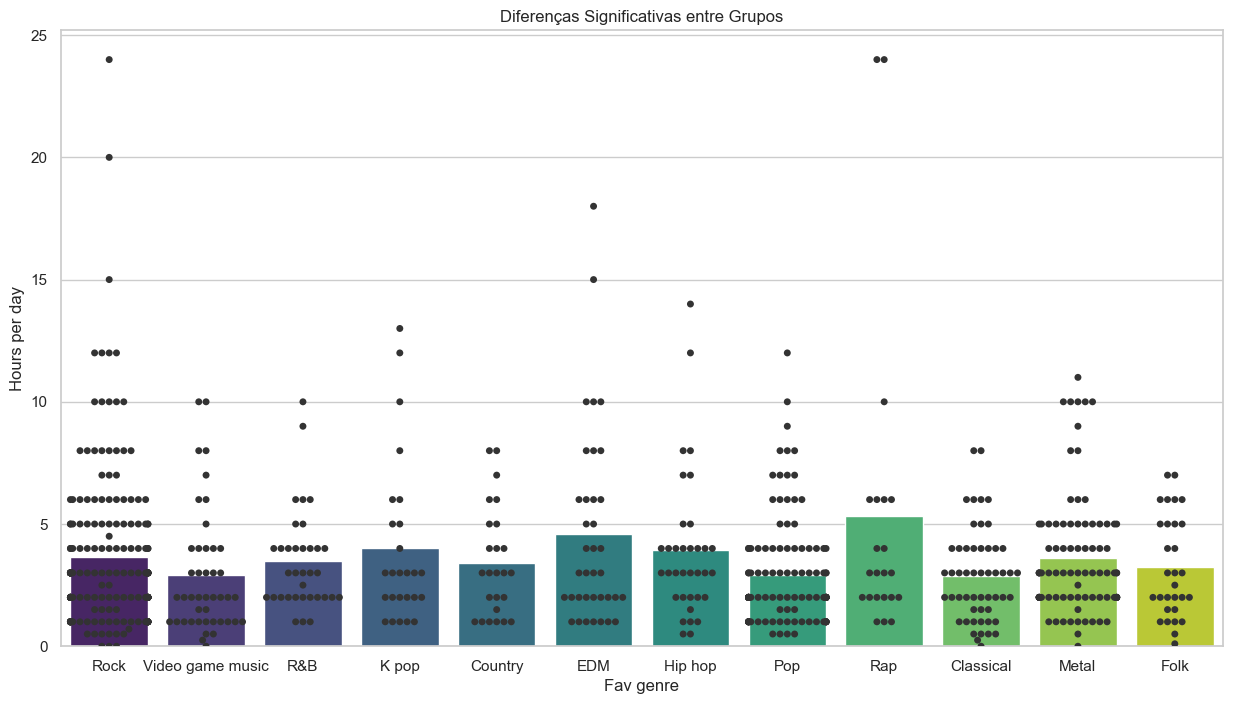

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(
    x="Fav genre", y="Hours per day", data=df, ci=None, capsize=0.1, palette="viridis"
)
sns.swarmplot(x="Fav genre", y="Hours per day", data=df, color="0.2")
plt.title("Diferen√ßas Significativas entre Grupos")
plt.show()

**Resposta** : $\newline$
N√£o h√° diferen√ßa significativa nos tempos m√©dios de audi√ß√£o entre os g√™neros musicais.

----

## <div align="center">Exerc√≠cio 5</div>

##### O sucesso de uma equipe esportiva n√£o se limita apenas √†s habilidades f√≠sicas dos atletas, mas tamb√©m √© influenciado por fatores psicol√≥gicos, incluindo o estilo de treinamento adotado pelo treinador. Diferentes treinadores t√™m abordagens √∫nicas para motivar, orientar e interagir com seus atletas. Pensando nisso, um estudo foi feito durante um ano para explorar o impacto do comportamento do treinador no desempenho de equipes de atletas, para isso, avaliou-se o desempenho de equipes para diferentes tipos de treinadores que treinaram a equipe durante dois meses cada um. A hip√≥tese em teste √© que o comportamento do treinador durante o treinamento pode ter um efeito significativo no desempenho das equipes na corrida. Acredita-se que certos tipos de treinadores podem influenciar positivamente os resultados, enquanto outros podem ter diferentes implica√ß√µes no desempenho dos atletas. Entenda como impacto positivo, uma diminui√ß√£o no tempo que as equipes levaram para finalizar a corrida. Use a base de dados ‚ÄúTreinador.csv‚Äù e conclua se existe essa diferen√ßa significativa do comportamento do treinador no tempo de corrida das equipes, use o n√≠vel de signific√¢ncia de 5%. Com base nos resultados conseguimos identificar uma diferen√ßa? Se sim, entre quais tipos de comportamentos vemos um tempo menor para finaliza√ß√£o da corrida?

*Objetivo*: Validar se existe essa diferen√ßa significativa do comportamento do treinador no tempo de corrida das equipes, use o n√≠vel de signific√¢ncia de 5%. Se sim, entre quais tipos de comportamentos vemos um tempo menor para finaliza√ß√£o da corrida?

#### <div align="center">**Hip√≥teses:**</div>

$$
    H_0 : \text{N√£o h√° efeito significativo do comportamento do treinador no desempenho da equipe na corrida.} \newline 
    H_1 : \text{Existe um efeito significativo do comportamento do treinador no desempenho da equipe na corrida.}
$$

In [46]:
data5 = pd.read_csv("ImpactoTreinador.csv", sep=",")
data5.head()

Equipe  Semana Tipo de Treinador  Tempo de Corrida
0       1       1         Motivador         42.483571
1       1       1          Rigoroso         46.308678
2       1       1       Colaborador         53.238443
3       1       1         Anal√≠tico         47.615149
4       2       1         Motivador         38.829233

In [47]:
df = pd.DataFrame(data5[["Tipo de Treinador", "Tempo de Corrida"]])

In [48]:
df.head()

Tipo de Treinador  Tempo de Corrida
0         Motivador         42.483571
1          Rigoroso         46.308678
2       Colaborador         53.238443
3         Anal√≠tico         47.615149
4         Motivador         38.829233

In [49]:
df.isnull().sum().sort_index() / len(df)

Tempo de Corrida     0.0
Tipo de Treinador    0.0
dtype: float64

In [50]:
df.isna().sum().sort_index() / len(df)

Tempo de Corrida     0.0
Tipo de Treinador    0.0
dtype: float64

In [51]:
df["Tipo de Treinador"].unique()

array(['Motivador', 'Rigoroso', 'Colaborador', 'Anal√≠tico'], dtype=object)

**An√°lise de pressupostos**

In [52]:
# Shapiro-Wilk para normalidade por Tempo de Corrida
for tp_treinador in df["Tipo de Treinador"].unique():
    print(tp_treinador)
    print("--------------------------------------------------")
    treinador_data = df[df["Tipo de Treinador"] == tp_treinador]["Tempo de Corrida"]
    stat, p_value = shapiro(treinador_data)
    print(f"Shapiro-Wilk Test for {tp_treinador} - p-value: {p_value}")
    if p_value > 0.05:
        print(f"Os dados de {tp_treinador} parecem seguir uma distribui√ß√£o normal.\n")
    else:
        print(f"Os dados de {tp_treinador} n√£o seguem uma distribui√ß√£o normal.\n")

# Levene para homogeneidade das vari√¢ncias
stat, p_value = levene(
    df[df["Tipo de Treinador"] == "Motivador"]["Tempo de Corrida"],
    df[df["Tipo de Treinador"] == "Rigoroso"]["Tempo de Corrida"],
    df[df["Tipo de Treinador"] == "Colaborador"]["Tempo de Corrida"],
    df[df["Tipo de Treinador"] == "Anal√≠tico"]["Tempo de Corrida"],
)
print(f"\nLevene Test - p-value: {p_value:.4f}")
if p_value > 0.05:
    print("As vari√¢ncias s√£o homog√™neas.")
else:
    print("As vari√¢ncias n√£o s√£o homog√™neas.")

Motivador
--------------------------------------------------
Shapiro-Wilk Test for Motivador - p-value: 0.9863467812538147
Os dados de Motivador parecem seguir uma distribui√ß√£o normal.

Rigoroso
--------------------------------------------------
Shapiro-Wilk Test for Rigoroso - p-value: 0.06602644920349121
Os dados de Rigoroso parecem seguir uma distribui√ß√£o normal.

Colaborador
--------------------------------------------------
Shapiro-Wilk Test for Colaborador - p-value: 0.9958397150039673
Os dados de Colaborador parecem seguir uma distribui√ß√£o normal.

Anal√≠tico
--------------------------------------------------
Shapiro-Wilk Test for Anal√≠tico - p-value: 0.5084320306777954
Os dados de Anal√≠tico parecem seguir uma distribui√ß√£o normal.


Levene Test - p-value: 0.4352
As vari√¢ncias s√£o homog√™neas.


**Dado que estamos lidando com mais de dois grupos (tipo de treinador), ser√° realizado a An√°lise de Vari√¢ncia (ANOVA)**

In [53]:
tempo_motivador = df[df["Tipo de Treinador"] == "Motivador"]["Tempo de Corrida"]
tempo_rigoroso = df[df["Tipo de Treinador"] == "Rigoroso"]["Tempo de Corrida"]
tempo_colaborador = df[df["Tipo de Treinador"] == "Colaborador"]["Tempo de Corrida"]
tempo_analitico = df[df["Tipo de Treinador"] == "Anal√≠tico"]["Tempo de Corrida"]

# Realiza o teste t
statistic, p_value = stats.f_oneway(
    tempo_motivador, tempo_rigoroso, tempo_colaborador, tempo_analitico
)

# N√≠vel de signific√¢ncia
alpha = 0.05

# Avalia o valor p
if p_value < alpha:
    print(
        "Rejeitar H0: H√° diferen√ßa significativa no tempo de corrida entre os tipos de treinadores."
    )
else:
    print(
        "N√£o rejeitar H0: N√£o h√° evid√™ncia de diferen√ßa significativa no tempo de corrida entre os tipos de treinadores."
    )

Rejeitar H0: H√° diferen√ßa significativa no tempo de corrida entre os tipos de treinadores.


In [54]:
# Aplica o teste de Tukey para compara√ß√µes m√∫ltiplas
tukey_results = pairwise_tukeyhsd(df["Tempo de Corrida"], df["Tipo de Treinador"])

# Cria um DataFrame com os resultados do teste de Tukey
tukey_df = pd.DataFrame(
    data=tukey_results._results_table.data[1:],
    columns=tukey_results._results_table.data[0],
)

In [55]:
tukey_df

group1       group2  meandiff   p-adj    lower    upper  reject
0    Anal√≠tico  Colaborador    8.7142  0.0000   4.3268  13.1016    True
1    Anal√≠tico    Motivador   -1.4272  0.8246  -5.8146   2.9602   False
2    Anal√≠tico     Rigoroso    4.0770  0.0775  -0.3104   8.4644   False
3  Colaborador    Motivador  -10.1414  0.0000 -14.5288  -5.7540    True
4  Colaborador     Rigoroso   -4.6372  0.0344  -9.0246  -0.2498    True
5    Motivador     Rigoroso    5.5042  0.0084   1.1168   9.8916    True

In [56]:
tukey_df[tukey_df["reject"] == True]

group1       group2  meandiff   p-adj    lower    upper  reject
0    Anal√≠tico  Colaborador    8.7142  0.0000   4.3268  13.1016    True
3  Colaborador    Motivador  -10.1414  0.0000 -14.5288  -5.7540    True
4  Colaborador     Rigoroso   -4.6372  0.0344  -9.0246  -0.2498    True
5    Motivador     Rigoroso    5.5042  0.0084   1.1168   9.8916    True

**Resposta** : $\newline$
* Com base nos resultados, as diferen√ßas entre Colaborador e Rigoroso, Motivador e Rigoroso, Anal√≠tico e Colaborador, Colaborador e Motivador s√£o consideradas significativas. 
* N√£o h√° evid√™ncia suficiente para afirmar uma diferen√ßa significativa entre Anal√≠tico e Motivador, e Anal√≠tico e Rigoroso, embora haja uma tend√™ncia para o grupo Anal√≠tico e Rigoroso.

----

# Celebrando o Natal e as Festas de Final de Ano üéÑüéâ

## üéÖ Mensagem Afestiva

Desejamos a voc√™ professora um Feliz Natal e um Pr√≥spero Ano Novo! Que esta temporada de festas esteja repleta de alegria, amor e momentos especiais com amigos e familiares. ‚≠êüéâ
